<a href="https://colab.research.google.com/github/sainirahul08/DeepLearning/blob/main/Rahul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import modules
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [19]:
#load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
print(train_images.shape)

(60000, 28, 28)


In [21]:
#require only training images, labels not required
train = train_images

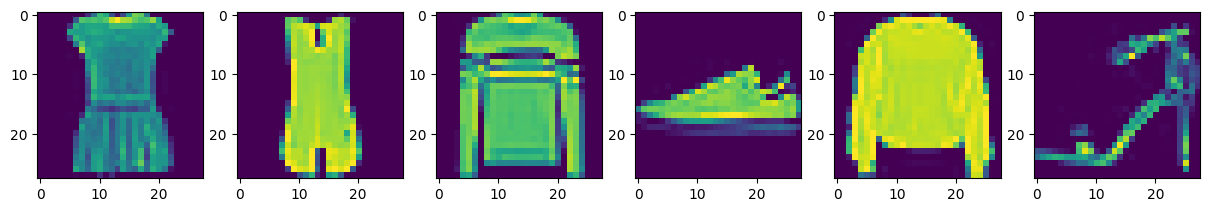

In [22]:
#visualize training data
fig,axes = plt.subplots(1,6,figsize=(15,15))
for index,x in enumerate(train[3:9]):
    axes[index].imshow(x)

In [23]:
def preprocess(records):
    images =  records['image']
    images = tf.cast(images, tf.float32)/255.0
    return images

dataset = tf.data.Dataset.from_tensor_slices({'image':train})
dataset = dataset.map(preprocess)
dataset = dataset.repeat(3).shuffle(100).batch(128).prefetch(1)

In [24]:
print(dataset)

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)>


In [25]:
input_shape = (28,28,1)
discr_out_dim = 2 #discriminator
gen_input_dim = 4 #generator
depth = 5
kernel_size = 3
activation = 'tanh'
dropout = 0.1

In [26]:
def discriminator(input_shape, dim, depth, kernel, dropout,activation):
    layers = []
    layers.append(InputLayer(input_shape=input_shape))
    for i in range(1,depth):
        layers.append(Conv2D(16*i,kernel_size=kernel_size))
        layers.append(BatchNormalization())
        layers.append(Activation('relu'))
        layers.append(Dropout(dropout))
    layers.append(Flatten())
    layers.append(Dense(128,activation='relu'))
    layers.append(Dense(dim))
    return Sequential(layers)

discr = discriminator(input_shape, discr_out_dim, depth, kernel_size, dropout,activation)

In [27]:
discr.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 22, 22, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,324,210 (12.68 MB)

 Trainable params: 3,323,890 (12.68 MB)

 Non-trainable params: 320 (1.25 KB)

In [28]:
def generator(input_shape, depth, output_shape,kernel,dropout):
    layers = []
    layers.append(InputLayer(input_shape=(input_shape,)))
    layers.append(Dense(784,activation='relu'))
    layers.append(Reshape(target_shape=output_shape))
    for i in range(1,depth):
        layers.append(Conv2DTranspose(16*i,kernel_size=kernel))
        layers.append(BatchNormalization())
        layers.append(Activation('relu'))
        layers.append(Dropout(dropout))

    resizer =  lambda name: Lambda(lambda images: tf.image.resize(images, [28,28]), name=name)
    layers.append(resizer('Reshape'))
    layers.append(Conv2DTranspose(1,kernel_size=1,activation=None))
    return Sequential(layers)
gen = generator(gen_input_dim, depth, input_shape,kernel_size,dropout)

In [29]:
gen.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 784)            │         3,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 30, 30, 16)     │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 34, 34, 48)     │        13,872 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 34, 34, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 34, 34, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 34, 34, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 36, 36, 64)     │        27,712 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape (Lambda)                │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 28, 28, 1)      │            65 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 51,009 (199.25 KB)

 Trainable params: 50,689 (198.00 KB)

 Non-trainable params: 320 (1.25 KB)

In [30]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
discr_opt = tf.keras.optimizers.Adam()
gen_opt = tf.keras.optimizers.Adam()

In [31]:
#batch-wise
def training(training_data):
    batch_size = tf.shape(training_data)[0]
    real_data = training_data
    real_labels = tf.ones((batch_size,))
    fake_labels = tf.zeros((batch_size,))
    labels = tf.concat((real_labels,fake_labels),axis=0)
    noise = tf.random.normal((batch_size,gen_input_dim),mean=0,stddev=1)

    with tf.GradientTape() as gen_gt, tf.GradientTape() as discr_gt:

        fake_images = gen(noise,training=True)
        fake_labels_2 = discr(fake_images,training=True)
        real_labels_2 = discr(training_data,training=True)
        predicted_labels = tf.concat((real_labels_2,fake_labels_2),axis=0)


        discrim_loss = loss(labels,predicted_labels)
        #print(discrim_loss)
        gen_loss = loss(real_labels,fake_labels_2)

    gen_grad = gen_gt.gradient(gen_loss,gen.trainable_variables)
    discr_grad = discr_gt.gradient(discrim_loss,discr.trainable_variables)

    gen_opt.apply_gradients(zip(gen_grad, gen.trainable_variables))
    discr_opt.apply_gradients(zip(discr_grad, discr.trainable_variables))

    return discrim_loss, gen_loss

In [32]:
#epoch-wise
def epoch_training(data_iterator, steps_per_epoch, avg_gen_loss, avg_dis_loss):
    for x in range(steps_per_epoch):
        d_loss, g_loss = training(next(data_iterator))
        avg_gen_loss.update_state(g_loss)
        avg_dis_loss.update_state(d_loss)
        if x%20==0:
            print('{} iterations done'.format(x))

    gen_loss = avg_gen_loss.result()
    dis_loss = avg_dis_loss.result()


    tf.summary.scalar('gen_loss',gen_loss,step=gen_opt.iterations)
    tf.summary.flush()
    tf.summary.scalar('dis_loss',dis_loss,step=discr_opt.iterations)
    tf.summary.flush()

    avg_gen_loss.reset_state()
    avg_dis_loss.reset_state()
    return gen_loss.numpy(), dis_loss.numpy()

In [33]:
#complete training
def train(training_data, epochs):

    avg_generator_loss = tf.keras.metrics.Mean()
    avg_discriminator_loss = tf.keras.metrics.Mean()

    data_iterator = training_data.__iter__()
    for i in range(epochs):
            gen_loss, dis_loss = epoch_training(data_iterator, 100, avg_generator_loss, avg_discriminator_loss)
            print({'gen_loss':gen_loss,'dis_loss':dis_loss})

In [34]:
train(dataset, 10)

0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.82311404), 'dis_loss': np.float32(1.0289737)}
0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.6906193), 'dis_loss': np.float32(0.6931503)}
0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.6918634), 'dis_loss': np.float32(0.69314826)}
0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.69261086), 'dis_loss': np.float32(0.69314665)}
0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.6929609), 'dis_loss': np.float32(0.6931466)}
0 iterations done
20 iterations done
40 iterations done
60 iterations done
80 iterations done
{'gen_loss': np.float32(0.6930935), 'dis_loss': np.float32(0.6931466)}
0 iter

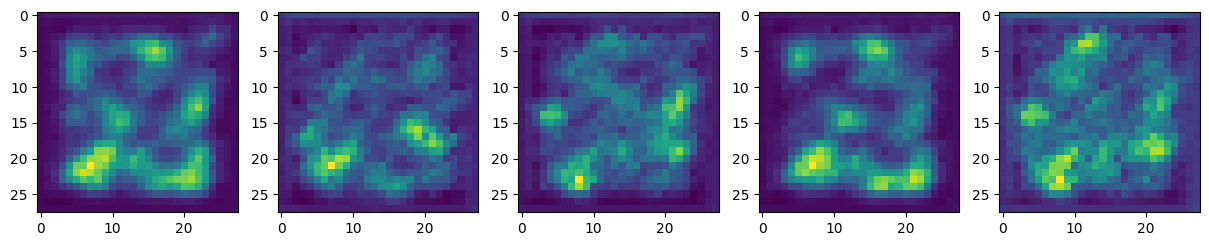

In [35]:
noise = tf.random.normal((5,4), mean=0, stddev=1)
images = gen(noise, training=False)
fig, axes = plt.subplots(1,5,figsize=(15,15))
for index, x in enumerate(images):
    axes[index].imshow(x)